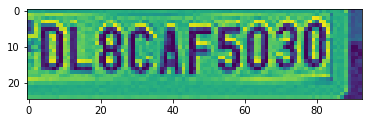

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


DL8CAF5030 


In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import easyocr

plateCascade = cv2.CascadeClassifier('indian_license_plate.xml')


def detect_plate_no(img):
    plateImg = img.copy()
    roi = img.copy()
    plateRect = plateCascade.detectMultiScale(plateImg,scaleFactor = 1.5, minNeighbors = 7)
    for (x,y,w,h) in plateRect:
        a,b = (int(0.01*img.shape[0]), int(0.04*img.shape[1]))
        platePart = roi[y+a:y+h-a, x+b:x+w-b, :]
        cv2.rectangle(plateImg,(x,y),(x+w, y+h),(51,51,255),3)
    return plateImg, platePart


def display_plate_no(img):
    img_ = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img_)
    plt.show()


inputImg = cv2.imread('car2.jpg')
inpImg, plate = detect_plate_no(inputImg)

display_plate_no(plate)

reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
text = result[0][1]
print(text)

In [31]:
import cgi
import requests
import xmltodict
import json

user = "Ani"
def get_vehicle_info(number):
    r = requests.get(f"http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={text}&username={user}")
    data = xmltodict.parse(r.content)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1


p = get_vehicle_info(text)

s="DESCRIPTION: "+str(p['Description'])+"\n"+"CAR COMPANY: "+str(p['CarMake']['CurrentTextValue'])+"\n"+"CAR MODEL: "+str(p['CarModel']['CurrentTextValue'])+"\n"+"FUEL TYPE: "+str(p['FuelType']['CurrentTextValue'])+"\n"+"ENGINE SIZE: "+str(p['EngineSize']['CurrentTextValue'])+"\n"+"NUMBER OF SEATS: "+str(p['NumberOfSeats']['CurrentTextValue'])+"\n"+"REGISTRATION YEAR: "+str(p['RegistrationYear'])+"\n"+"REGISTRATION DATE: "+str(p['RegistrationDate'])+"\n"+"VEHICLE IDENTIFICATION NUMBER: "+str(p['VechileIdentificationNumber'])+"\n"+"ENGINE NUMBER: "+str(p['EngineNumber'])+"\n"+"VEHICLE TYPE: "+str(p['VehicleType'])+"\n"+"LOCATION: "+str(p['Location'])
print(s)

DESCRIPTION: MERCEDES-BENZ CLA CLASS CLA 45 AMG COUPE
CAR COMPANY: MERCEDES-BENZ
CAR MODEL: CLA CLASS
FUEL TYPE: Petrol
ENGINE SIZE: 1991
NUMBER OF SEATS: 5
REGISTRATION YEAR: 2014
REGISTRATION DATE: 13/06/2014
VEHICLE IDENTIFICATION NUMBER: WDD1173522N056045
ENGINE NUMBER: 13398080004697
VEHICLE TYPE: MOTOR CAR(LMV)
LOCATION: DY.DIR.ZONAL OFFICE,DELHI NORTH WEST,WAZIRPUR
